## Importing libraries

In [ ]:
# Installing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import sklearn
from seaborn.matrix import heatmap
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

In [ ]:
data = pd.read_excel('mushrooms.xlsx')

In [ ]:
data.shape

(8124, 23)

## Dataset Information

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Checking for **null** values!

In [ ]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Data Engineering

In [ ]:
dataset = data.copy()

In [ ]:
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
dataset['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Encoding all the columns of the dataset.

In [ ]:
dataset = dataset.apply(lambda x: pd.factorize(x)[0])

## 📊EDA

Correlation graph!

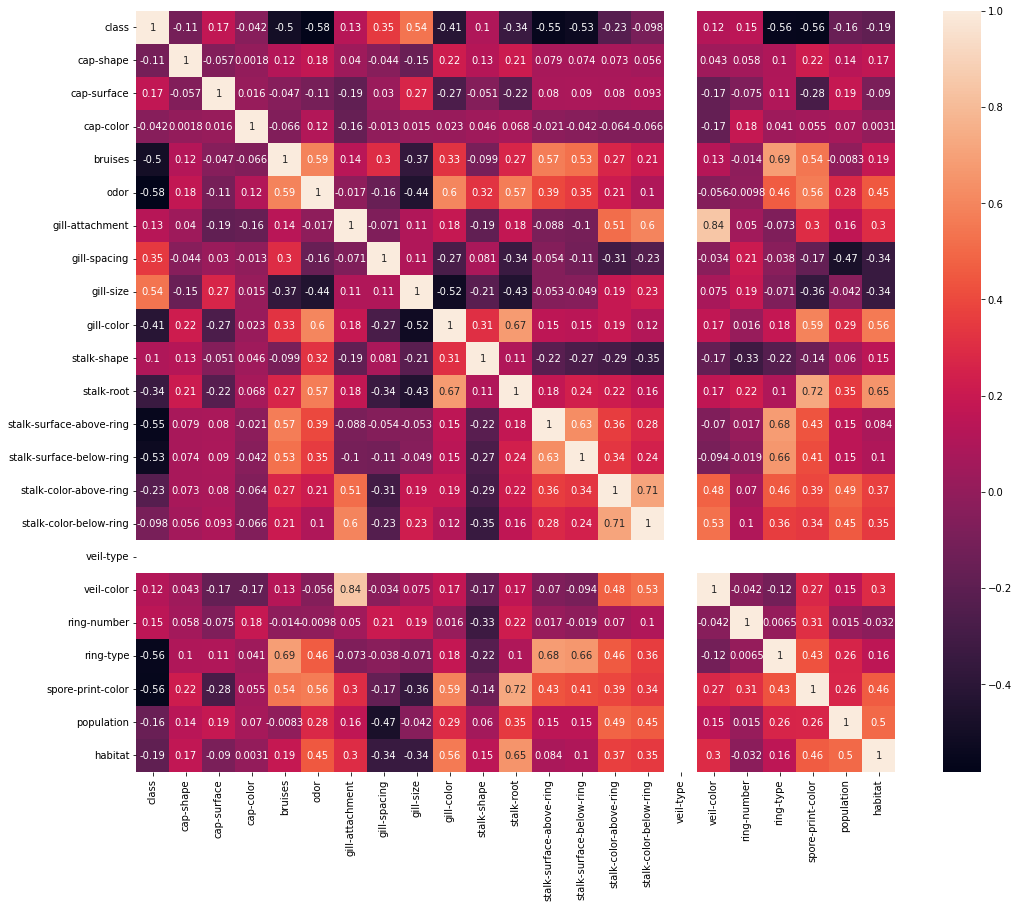

In [ ]:
plt.figure(figsize=(17,14))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

In the below chart, we plotted all the variables sorting their correlations with the **class** variable.

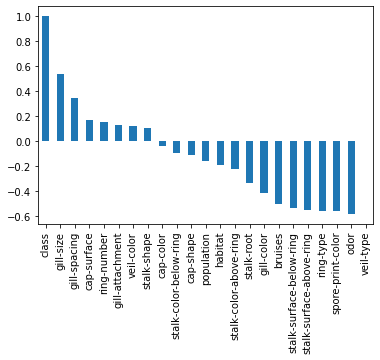

In [ ]:
dataset.corr()['class'].sort_values(ascending=False).plot(kind='bar')
plt.show()

We can get rid of the **veil-type** column as it serves no purpose in the modeling. 

In [ ]:
dataset = dataset.drop('veil-type', axis=1)

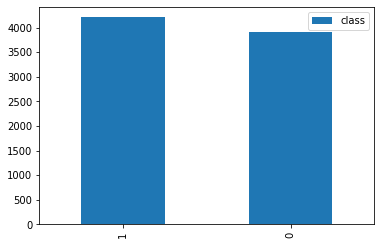

In [ ]:
dataset['class'].value_counts().plot(kind='bar')
plt.legend()
plt.show()

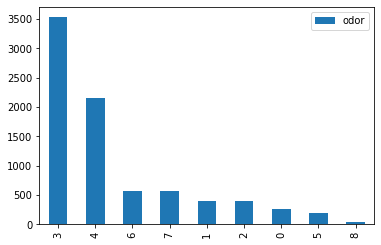

In [ ]:
dataset['odor'].value_counts().plot(kind='bar')
plt.legend()
plt.show()

## Modeling

We'll be using the Decision Tree Regressor.

In [ ]:
features = dataset.drop(['class'], axis=1)
target = dataset['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.22, random_state=42)

In [ ]:
dtree = DecisionTreeRegressor(criterion='squared_error', random_state=1).fit(X_train, y_train)

In [ ]:
dtree.score(X_test, y_test)

1.0

We can see that our model is overfitting. We can prune the tree to avoid this situation.

By setting the **max_depth** parameter to 3, we are lmiting the growth of the tree upto 3 levels maximum.

In [ ]:
dtree = DecisionTreeRegressor(max_depth=3, criterion='squared_error', random_state=1).fit(X_train, y_train)

In [ ]:
dtree.score(X_test, y_test)

0.94883717465382

[Text(0.6, 0.875, 'x[4] <= 3.5\nsquared_error = 0.25\nsamples = 6336\nvalue = 0.518'),
 Text(0.4, 0.625, 'x[4] <= 0.5\nsquared_error = 0.073\nsamples = 3561\nvalue = 0.921'),
 Text(0.2, 0.375, 'squared_error = 0.0\nsamples = 189\nvalue = 0.0'),
 Text(0.6, 0.375, 'x[18] <= 4.5\nsquared_error = 0.027\nsamples = 3372\nvalue = 0.972'),
 Text(0.4, 0.125, 'squared_error = 0.011\nsamples = 3209\nvalue = 0.989'),
 Text(0.8, 0.125, 'squared_error = 0.227\nsamples = 163\nvalue = 0.65'),
 Text(0.8, 0.625, 'squared_error = 0.0\nsamples = 2775\nvalue = 0.0')]

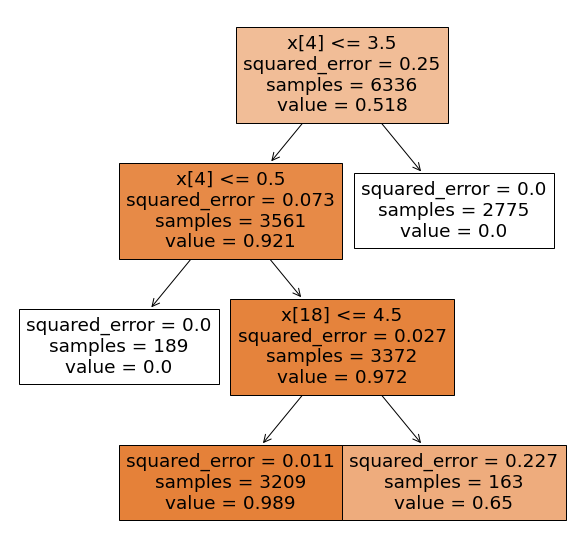

In [ ]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(dtree,
                   filled=True)

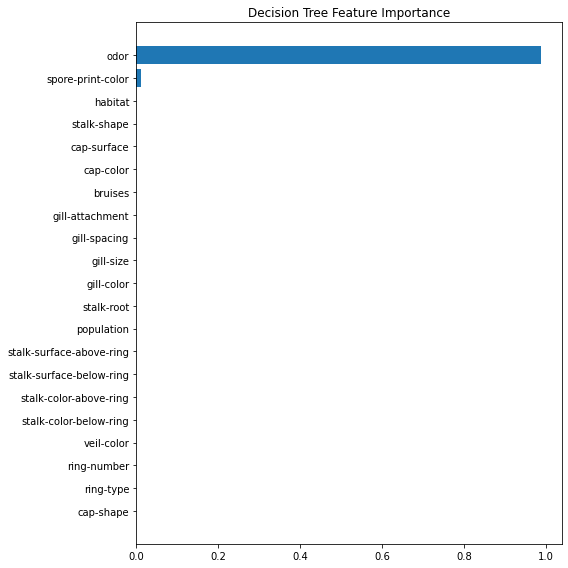

In [ ]:
# Get Model Feature Importance
feature_importance = dtree.feature_importances_
# Sort Feature Importance
sorted_idx = np.argsort(feature_importance)
# Plot Feature Importance
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
# Add bars
plt.barh(pos, feature_importance[sorted_idx], align='center')
# Add labels
plt.yticks(pos, np.array(X_train.columns.values)[sorted_idx])
# Add title and axis names
title = 'Decision Tree Feature Importance'
plt.title(title)
fig.tight_layout()
# Show plot
plt.show()

**Actual vs Predicted values**

The image below demonstrates how well our model predicted the **p** class with 0 incorrect labels while only minimally predicting the **e** class with 27 incorrect labels.

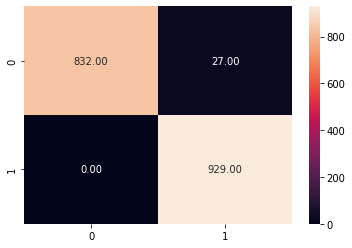

In [ ]:
preds = dtree.predict(X_test)

heatmap(confusion_matrix(y_test, np.round(preds)), annot=True, fmt='.2f')
plt.show()